# Molecular Dynamics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from auxiliary_functions import initial_positions, compute_area

## Exercise 1: Harmonic Oscillator

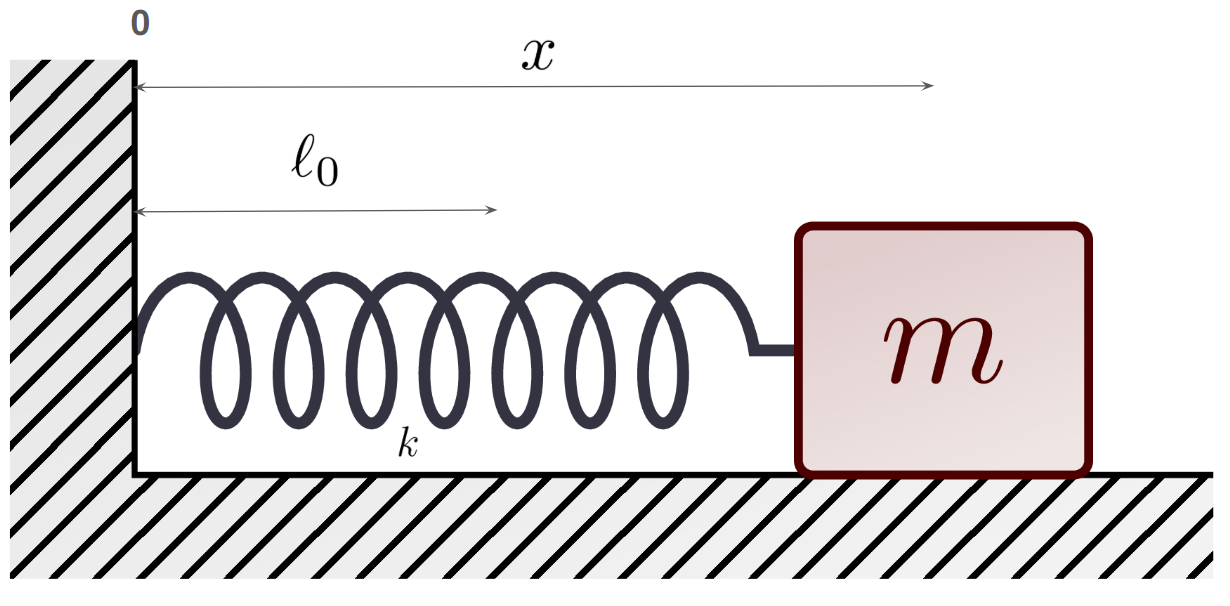

### Task 1 & 2: Define a function harmonic force & use it to perfor a simulation using the Euler method

Force function:

In [ ]:
def harmonic_force(l0, k, x):   # Compute Harmonic Force
    return ...

Simulation:

In [ ]:
# Time parameters
T = 20          # total time
dt = .001       # time step 
N = int(T / dt) # number of steps

# Arrays
t = np.linspace(0, T, N)
x = np.zeros(N)
v = np.zeros(N)

# Particle parameters
m = 1
x[0] = 1 # initial position 
v[0] = 0 # initial velocity 

# Spring parameters
k = 1 
l0 = 0

for i in range(N - 1):  # Loop over timesteps
    x[i+1] = ...                           # Write the update of positions using the Euler method
    v[i+1] = ...                           # Write the update of velocities using the Euler method and your harmonic_force

Plot:

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Position x(t)')
plt.plot(t, v, label='Velocity v(t)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('x, v')
plt.legend()
plt.title('Harmonic Oscillator (Euler Method)')
plt.axis('equal')
plt.grid()
plt.show()

### Task 3: Make sure that your simulation fulfill the following checks

Quick Checks
 - What happen when you decrease the mass of the particle? Does the frequency of the movement increase? □
 - What happen when you set the l0 = x[0] and with v[0] = 0? Do you get a "flat" movement? Why? □
 - What happen when you increase the k? Do you get "more waves"? □

### Task 4: Plot the phase space v vs x

In [ ]:
# Plot phase space
...

### Questions to discuss with your nearest neighbor(s): 

What happend when you increase the timestep? Why?

The velocities are the value of the slopes at each position in the plot x vs t. Can you see this in the plots that you obtained?

To think about: How can we check if the method is time-reversible?

###  Task 5: Create you own force and simulate it, and plot it!

### Example:

In [ ]:
def my_force(x):
    return - x - .99 * np.cos(5*x)*x + 0.1 * np.exp(-x**2 /10) 

Copy&paste the cell where you simulated the harmonic oscillator and replace harmonic_force -> my_force

In [ ]:
...

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Position x(t)')
plt.plot(t, v, label='Velocity v(t)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('x, v')
plt.legend()
plt.title('My Oscillator (Euler Method)')
plt.grid()
plt.show()

In [ ]:
# Plot phase space

## Exercise 2: Interatomic potential

### Task 1: Create your own interatomic potential with the criteria discussed in the lesson.

For example:

In [ ]:
def my_interatomic_potential(x,a,b,k):
    return ((x - a)**k - b)*np.exp(-x)

In [ ]:
# Time parameters
X = ...          # total distance
dx = .1        # distance step
N = int(X / dx) # number of steps
x = np.linspace(0, X, N)
u = np.zeros(N)
for i in range(N):
    u[i] = my_interatomic_potential(x[i],4,10,2 )

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(x, u)
plt.xlabel('Position x')
plt.ylabel('Potential Energy')
plt.title('My Interatomic Potential (U vs x)')
plt.grid()
plt.axis('equal')  # make the scale equal to see elliptical orbits correctly
plt.show()

Simple functions

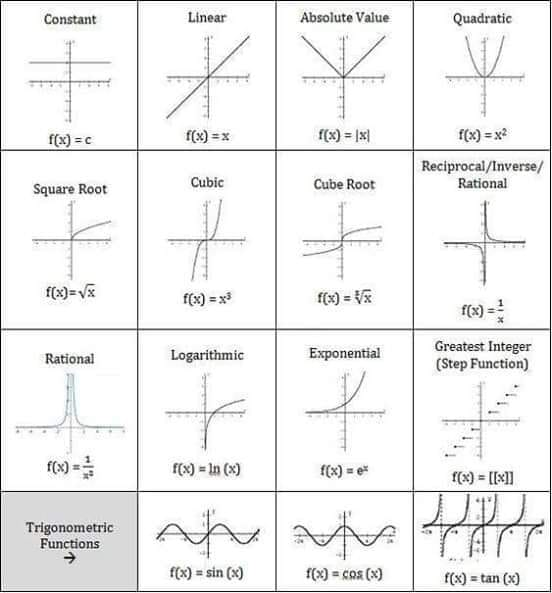

### Task 2: Compute the force relate with your potential

In [ ]:
def My_interatomic_force(x,a,b,k):
    return - ((k*(x - a)**(k-1))*np.exp(-x) - np.exp(-x) * ((x - a)**k - b) )

In [ ]:
f = np.zeros(N)
for i in range(N):
    f[i] = My_interatomic_force(x[i], ... )

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(x, f)
plt.xlabel('Position x')
plt.ylabel('Potential Energy')
plt.title('My Interatomic Force (x vs v)')
plt.grid()
plt.axis('equal')
plt.show()

## Exercise 3: Properties of classical dynamics

### Task 1: Does the Euler method is time reversible?

Follow the instructions of the lecture:

In [ ]:
# Time parameters
T = 20          # total time
dt = ...        # time step 
N = int(T / dt) # number of steps

# Arrays
t = np.linspace(0, T, N)
x = np.zeros(N)
v = np.zeros(N)

# Particle parameters
m = 1
x[0] = 1 # initial position 
v[0] = 0 # initial velocity 

# Spring parameters
k = 1 
l0 = 0

for i in range(N - 1):  # Copy&Paste your Euler method
    ...

In [ ]:
x[0], v[0], x[-1], v[-1] 

### Task 2: Does the Euler method conserves energy?

Run again the first simulation of the previous task, so that the arrays x and v represent a normal simulation (forward in time). In this arrays you have stored the positions an velocities at each timestep. Compute the kinetic and potential energy in a vectorial way|

In [ ]:
def Harmonic_potential_energy(x, l0, k):
    return ...

In [ ]:
def Kinetic_energy(v , m): 
    return ...

In [ ]:
Total_energy = Harmonic_potential_energy(x, l0, k) + Kinetic_energy(v , m)

In [ ]:
plt.plot(t, Harmonic_potential_energy(x, l0, k))
plt.plot(t, Kinetic_energy(v , m))
plt.plot(t ,Total_energy)

In [ ]:
plt.plot(t ,Total_energy)

In [ ]:
Total_energy[0], Total_energy[-1]

### Task 3: Does the Euler method preserve phase space volume?

We can create some initial positions in phase space with the function initial_positions, set the number of points (positional argument) in each side of length r=1 (r=Int is an optional argument)

In [ ]:
x0s,v0s = initial_positions(...) # Write an integer >2 as argument of the function

In [ ]:
plt.plot(x0s, v0s, marker='o', markersize=3)
plt.title("Initial Phase Space")
plt.xlabel("x")
plt.ylabel("v")
plt.axis('equal')
plt.grid()

In [ ]:
compute_area(x0s,v0s)

Use your Euler method to compute all the final positions and velocities for the initial conditions x0s and v0s

In [ ]:
T = 20          # total time
dt = ...        # time step
N = int(T / dt) # number of steps

# Arrays
t = np.linspace(0, T, N)
xfs = np.zeros(len(x0s)) # final positions
vfs = np.zeros(len(v0s)) # final velocities

# Particle parameters
m = 1

# Spring parameters
k = 1 
l0 = 0

for j, (x0, v0) in enumerate(zip(x0s, v0s)): # Loop over initial conditions
    for i in range(N - 1):                   # Loop over time
        xn =
        vn =
        x0 = xn
        v0 = vn
    xfs[...] =          # the elipsis [...] should also be modified
    xfs[...] =    

In [ ]:
plt.plot(xfs, vfs, marker='o', markersize=3)
plt.title("Initial Phase Space")
plt.xlabel("x")
plt.ylabel("v")
plt.axis('equal')
plt.grid()

In [ ]:
compute_area(xfs,vfs)

If you finish early, try this task with my_force, that you defined in Exercise 1, task 5. Try shorter simulations and denser initial positions and velocities, given by initial_positions

## Exercise 4: Verlet Integration

### Task 1: Does the Velocity-Verlet method is time reversible?

In [ ]:
# Time parameters
T = 20          # total time
dt = ...       # time step 
N = int(T / dt) # number of steps

# Arrays
t = np.linspace(0, T, N)
x = np.zeros(N)
v = np.zeros(N)

# Particle parameters
m = 1
x[0] = 1  # initial position 
v[0] = 0  # initial velocity 

# Spring parameters
k = 1 
l0 = 0

for i in range(N - 1):    # Loop over timesteps
    x[i+1] = ...                           # Write the update of positions using the Velocity Verlet method
    v[i+1] = ...                           # Write the update of velocities using the Velocity Verlet method

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Position x(t)')
plt.plot(t, v, label='Velocity v(t)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('x, v')
plt.legend()
plt.title('Harmonic Oscillator (Velocity Verlet Method)')
plt.grid()
plt.show()

In [ ]:
x[0], v[0], x[-1], v[-1]

### Task 2: Does the Velocity-Verlet method conserves energy?

In [ ]:
Total_energy = Harmonic_potential_energy(x, l0, k)+Kinetic_energy(v , m)

In [ ]:
plt.plot(t, Harmonic_potential_energy(x, l0, k))
plt.plot(t, Kinetic_energy(v , m))
plt.plot(t ,Total_energy)

In [ ]:
plt.plot(t ,Total_energy)

In [ ]:
Total_energy[0], Total_energy[-1]

### Task 3: Does the Velocity-Verlet method preserve phase space volume?

In [ ]:
T = 20          # total time
dt = ...        # time step
N = int(T / dt) # number of steps

# Arrays
t = np.linspace(0, T, N)
xfs = np.zeros(len(x0s))
vfs = np.zeros(len(v0s))

# Particle parameters
m = 1

# Spring parameters
k = 1 
l0 = 0

for j, (x0, v0) in enumerate(zip(x0s, v0s)):
    ...

In [ ]:
plt.plot(xfs, vfs, marker='o', markersize=3)
plt.title("Initial Phase Space")
plt.xlabel("x")
plt.ylabel("v")
plt.axis('equal')
plt.grid()

In [ ]:
compute_area(xfs,vfs)